# «Гомоскедастичность и Автокорреляция»

# Выполнил:
# Радайкин Артём, ПМ20-4 

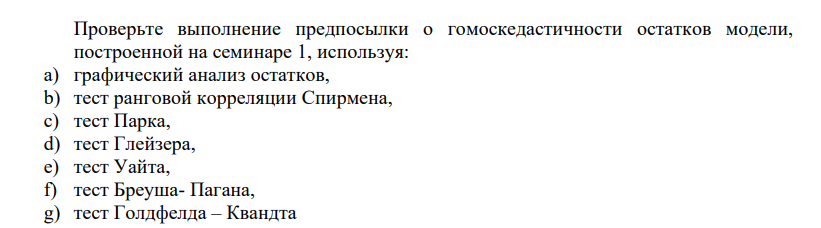

## Загружаем данные

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import patsy as pt
import sklearn.linear_model as lm
import scipy.stats as sts
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Эконометрика /Данные_дз_4.txt', sep='\t', decimal=',')
df.head(5)

,Year,X,Y
0,2000,4.0,4.077159
1,2001,4.7,0.954339
2,2002,5.8,1.695943
3,2003,6.0,2.796209
4,2004,5.5,3.852553


In [ ]:
df.corr()

,Year,X,Y
Year,1.000000,0.145465,-0.377455
X,0.145465,1.000000,-0.345970
Y,-0.377455,-0.345970,1.000000


In [ ]:
df.columns = ['Year', 'X', 'Y']

In [ ]:
X = df['X'].values
Y = df['Y'].values

In [ ]:
model = sm.OLS.from_formula("Y ~ X", data=df)
result = model.fit()
print(result.params)

Intercept    3.865800
X           -0.325203
dtype: float64


In [ ]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     2.040
Date:                Fri, 09 Dec 2022   Prob (F-statistic):              0.174
Time:                        12:02:00   Log-Likelihood:                -31.367
No. Observations:                  17   AIC:                             66.73
Df Residuals:                      15   BIC:                             68.40
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.8658      1.393      2.776      0.0

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
y_hat = model.predict(result.params, sm.add_constant(X))
vector_Se = y_hat - Y
vector_Se

array([-1.51216963,  1.38300926,  0.28368215, -0.88162455, -1.77536673,
       -0.41294237,  0.35936071,  1.85743663, -1.96500169, -0.57839809,
       -1.04902862, -0.43823192, -0.56414318,  0.60483539, -0.32134678,
        0.37368078,  4.63624863])

### **Графический анализ остатков**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


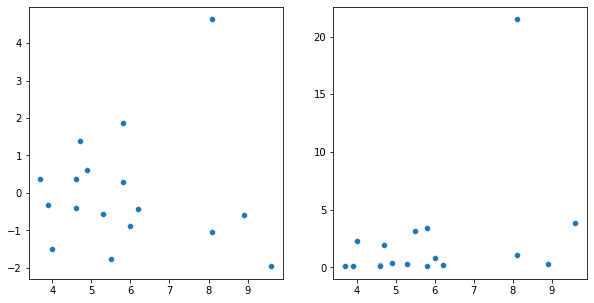

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(10, 5))

sns.scatterplot(X, vector_Se, ax=axes[0])
sns.scatterplot(X, vector_Se**2, ax=axes[1])

### **Тест Парка**

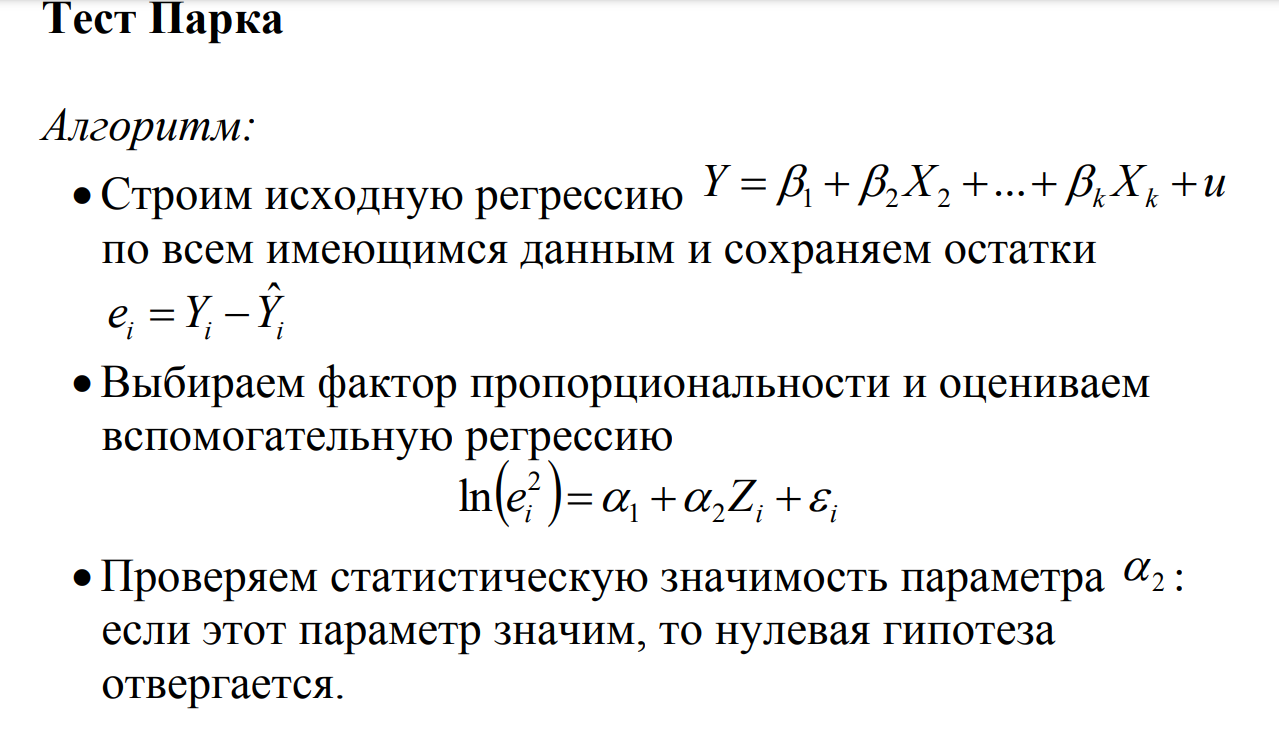

In [ ]:
model_2 = sm.OLS.from_formula("np.log(vector_Se**2) ~ np.log(X)", data=df)
result_2 = model_2.fit()
print(result_2.params)

Intercept   -4.780817
np.log(X)    2.516232
dtype: float64


In [ ]:
print(result_2.summary())

                              OLS Regression Results                              
Dep. Variable:     np.log(vector_Se ** 2)   R-squared:                       0.207
Model:                                OLS   Adj. R-squared:                  0.154
Method:                     Least Squares   F-statistic:                     3.909
Date:                    Fri, 09 Dec 2022   Prob (F-statistic):             0.0667
Time:                            12:02:01   Log-Likelihood:                -29.643
No. Observations:                      17   AIC:                             63.29
Df Residuals:                          15   BIC:                             64.95
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
t_tabl = sts.t.isf(0.05/2,15)
t_tabl

2.131449545559323

Значимость параметра дополнительной модели:
|t_набл| < t_табл (1.977 < 2.073873067904015) => H0 принимается => параметр модели незначим => гипотеза принимается и => гомоскедастичны остатки модели 

### Тест Уайта:

In [ ]:
from statsmodels.stats.diagnostic import het_white

white_test = np.round(het_white(vector_Se, result.model.exog), 4) # во 2-м это Х
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, white_test)))

{'Test Statistic': 2.6574, 'Test Statistic p-value': 0.2648, 'F-Statistic': 1.297, 'F-Test p-value': 0.3043}


p-value = 0.3043 > 0.05 => гипотеза H0 принимается и остатки модели гомоскедастичны

### Тест Голдфелда-Квандта

In [ ]:
#Тест Голфреда-Кванта
from statsmodels.stats import api
new_x = np.concatenate((np.ones((len(Y), 1)), X.reshape(-1, 1)), axis = 1)
api.het_goldfeldquandt(vector_Se, new_x)

(2.0584257717586887, 0.18341311337893662, 'increasing')

p-value = 0.18341311337893662 > 0.05 => гипотеза H0 принимается и остатки модели гомоскедастичны

# По итогам 3 тестов мы получили, что присутвует гомоскедастичность и => нам не стоит применять каких-либо действий для устранения гетероскедастичности 

# Автокорреляция


### График автокорреляции остатков модели

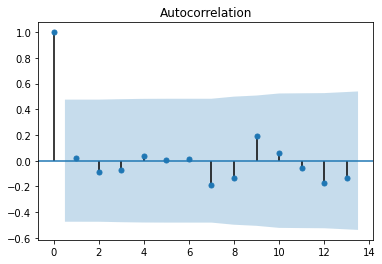

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(vector_Se).show()

### Критерий Дарбина - Уотсона

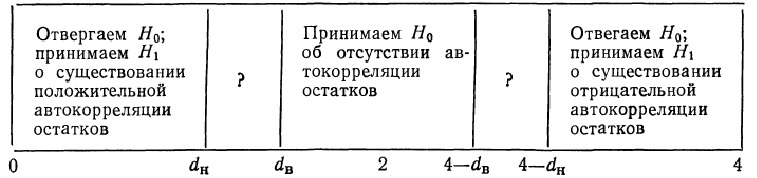

In [ ]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(result.resid)

1.3661089063564338

### Выбираем значения dl и du при уровне значимости k = 1, n = 17

In [ ]:
dl = 1.13
du = 1.38

a = 0
b = 4

print(f'{a}---{dl}---{du}---{b-du}---{b-dl}---{b}')
print(' cov>0        cov=0        cov<0 ')

0---1.13---1.38---2.62---2.87---4
 cov>0        cov=0        cov<0 


DW попадает под отрезок (dl; du) => мы не можем сделать точный вывод об автокорреляции


### Тест Бройша-Годфри: 

In [ ]:
from statsmodels.stats.diagnostic import acorr_breusch_godfrey
acorr_breusch_godfrey(result)

/usr/local/lib/python3.8/dist-packages/statsmodels/stats/diagnostic.py:826: FutureWarning: The default value of nlags is changing.  After 0.12, this value will become min(10, nobs//5). Directly setnlags or period to silence this warning.
  warnings.warn("The default value of nlags is changing.  After 0.12, "


(2.943803146510629,
 0.8901517559434736,
 0.23934969666562608,
 0.9623186489107156)

p-value = 0.8901517559434736 > 0.05 => H0 принимается => автокорреляция отсутствует